Your task today is challenging. You will need to partially follow the Machine Learning <strong><span style="color:skyblue">life cycle</span></strong> in order to answer some questions related to <strong><span style="color:salmon">Stroke prediction</span></strong>.



## Recall 

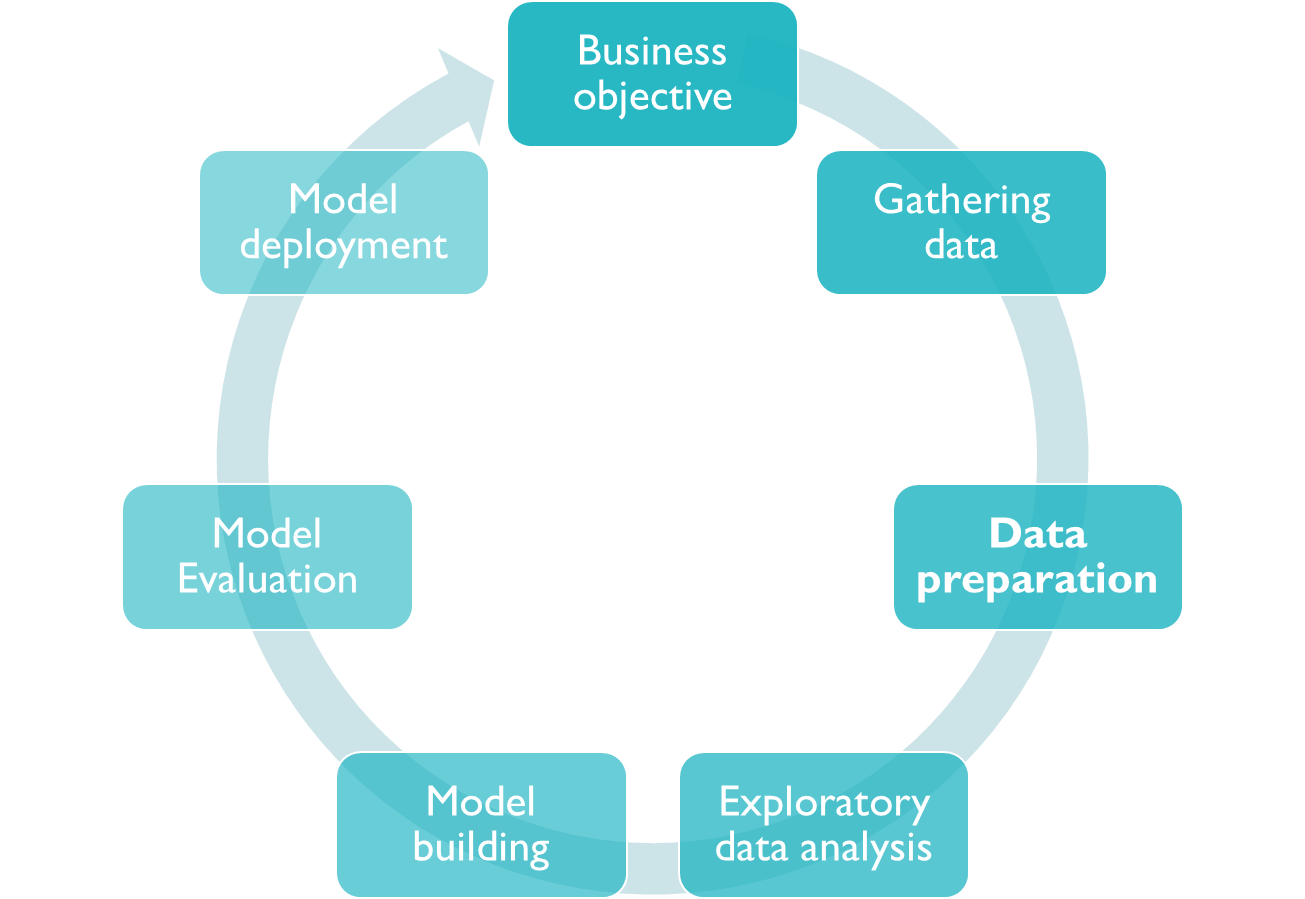

# <span style="color:skyblue">Business objective</span>
> Before jumpping to code and trying to fill in the TODOs meanless 😯
<span style="color:red">You should understand What you are trying to solve and what questions you need to answer!</span>


| Problem type | medical 💊🥼 |
| --- | --- |
| Data type  | tabular 💻(structured) |
| Topic | Stroke prediction 🧠 |

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.


## TODO 🎯 
> read and search about this problem 
- [سكتة دماغية](!https://ar.wikipedia.org/wiki/%D8%B3%D9%83%D8%AA%D8%A9_%D8%AF%D9%85%D8%A7%D8%BA%D9%8A%D8%A9)
- [Is It a Stroke or a Heart Attack?](!https://www.healthline.com/health/stroke-vs-heart-attack#causes)
- [Heart Disease and Stroke](!https://www.webmd.com/heart-disease/stroke)
- [What is stroke?](!https://www.heartandstroke.ca/stroke/what-is-stroke)
- [Stroke after a heart attack: What’s the risk?](!https://www.health.harvard.edu/heart-health/stroke-after-a-heart-attack-whats-the-risk)

> feel free to search from other resources if you want 

>"The formulation of the problem is often more essential than its solution, which may be merely a matter of mathematical or experimental skill."  <span style="color:red"> - Albert Einstein</span>

> "It is not the answer that enlightens, but the question."<span style="color:red"> - Eugene Ionesco  </span>

>"The art and science of asking questions is the source of all knowledge."  <span style="color:red">- Thomas Berger</span>

><span style="color:red">"asking the right question is the half way to the solution"</span>

> now list the information you gathered in this cell
- 80% Heart strokes are preventable (example)
- A stroke occurs because of a sudden interruption of blood flow in your brain
- The lifetime risk of stroke (from age 25 years onward) is 25.1% in women and 24.7% in men,
- 
- 
- 
> What is your questions that you need the data to Answer🤔?
- Does age has impact on strokes? and How is this parameter distributed?
- Does gender impact on strokes?
- Does Residence type impact on strokes?
- Does smoking status impact on strokes?
- Does glucose level impact on strokes?
- 




# <span style="color:skyblue">Gathering Data</span>
> I did it for you 🥰 so go and import the data file using `pandas`

In [1]:
# importing pandas 
import pandas as pd

In [2]:
# TODO: import the dataset 
df = pd.read_csv("C:/Users/CS/Downloads/healthcare-dataset-stroke-data.csv")
# Displaying the head of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# the shape of the dataset
# 5110 rows
# 12 cols 
df.shape

(5110, 12)

In [4]:
# let's see more info about the dataset
# TODO: note the messing values you need to deal with them 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


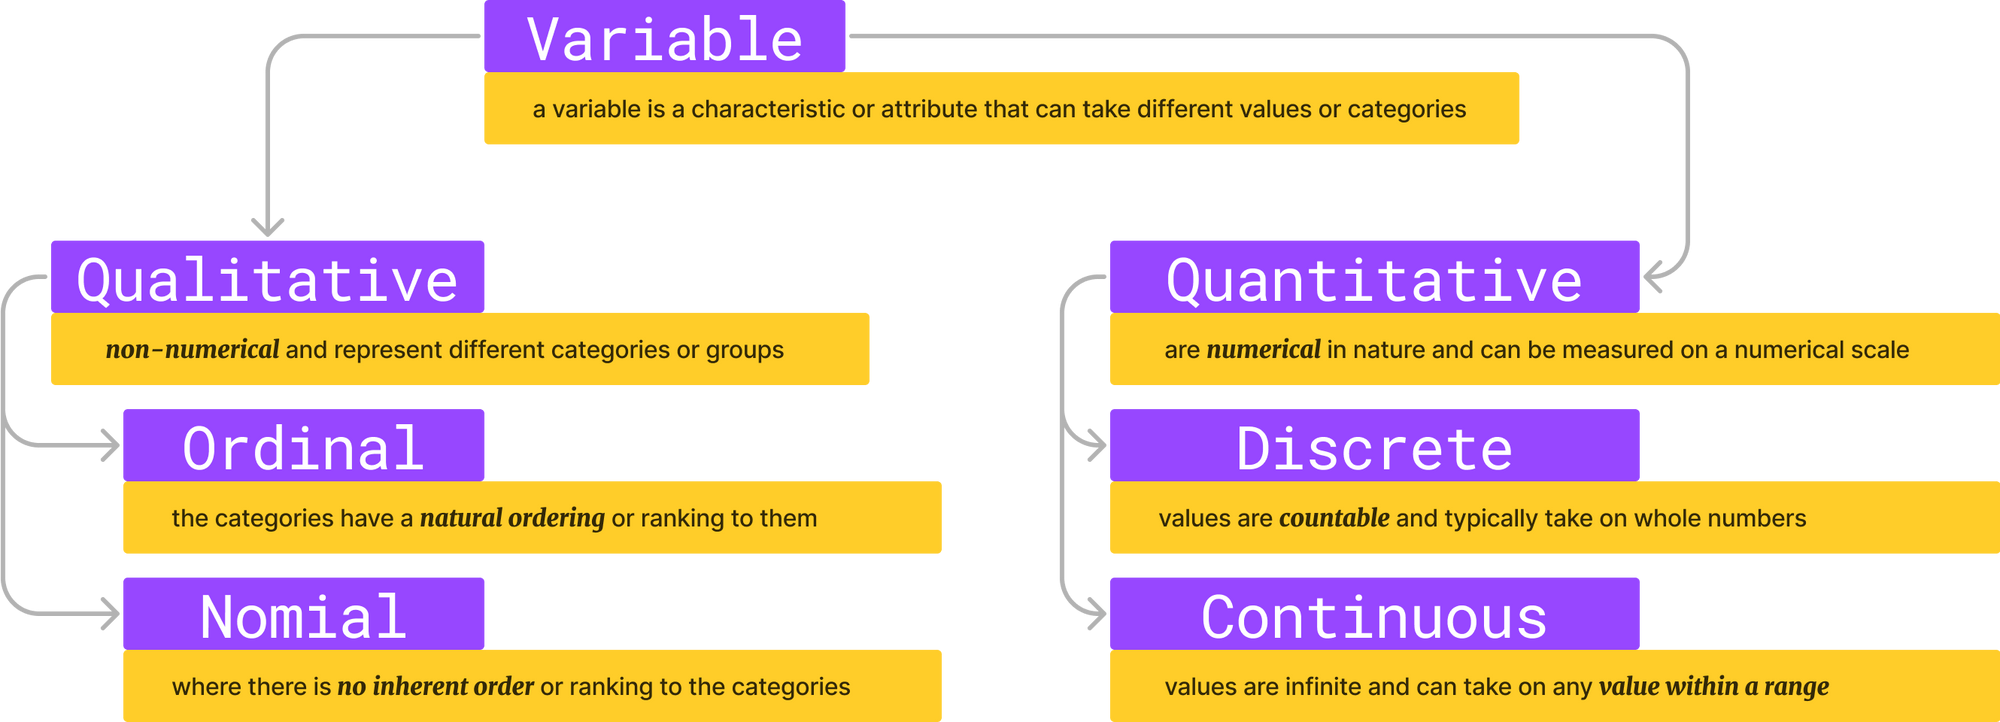

>You'll notice that we have various types of variables, and we need to handle each type differently in order to get them ready for the model.

In [5]:
# you can restate your questions a little bit if you think your question can't be answered with the data or you can add more questions inspired by the dataset features
# stroke is our target 
# let's describe our data statistically 
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
# TODO: describe the categorical features only 
df.describe(include='O')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [7]:
# the columns  of our dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

# TODO 🎯 
> list the features we have 
- <span style="color:skyblue">Categorical features</span> 
  - stroke (example)
  - gender
  - ever_married
  - Residence_type
  - smoking_status  
  - hypertension
  - heart_disease
- <span style="color:skyblue">Numerical features</span> 
  - <span style="color:salmon">Discrete</span> 
    - id (example)
    - 
    - 
  - <span style="color:salmon">Continous</span> 
    - age
    - avg_glucose_level	
    - bmi

# <span style="color:skyblue">Data Preperation</span>
> okay in this phase we should deal with the problems in the dataset 
🦾 problems we should solve 💻 
- Missing values ✅ 
- Encoding categorical features that are not numbers ❌ we would delay it after EDA
- Scalling the data ❌ we would delay it after EDA
- Feature extraction 
> EDA is  Exploratory Data Analysis


In [8]:
df.isnull().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
df['bmi'].fillna(df['bmi'].mode()[0], inplace=True)

## Feature extraction
>It involves selecting and transforming raw data into a set of meaningful features that can effectively represent the underlying patterns and characteristics of the data.

Dimensionality reduction: Feature extraction can help in reduceing the dimensionality of the data by selecting or creating a subset of relevant features. This is particularly valuable when working with high-dimensional datasets, as it reduces computational complexity, improves model performance, and mitigates the risk of overfitting.

Improved model performance: By extracting informative and discriminative features, the resulting feature set can enhance the performance of machine learning models. Relevant features provide more accurate representations of the data, enabling models to capture and generalize patterns effectively.

Noise reduction: Feature extraction can help filter out irrelevant or noisy features, improving the signal-to-noise ratio in the data. Removing noisy features can lead to more robust and accurate models by reducing the impact of irrelevant information.

Improved interpretability: <span style="color:red">Extracting meaningful features </span> can enhance the interpretability of the data and models. By transforming raw data into more understandable and intuitive representations, it becomes easier to interpret and explain the relationships and patterns discovered by the models.

Domain-specific knowledge incorporation: Feature extraction enables the incorporation of domain-specific knowledge and expertise into the analysis process. By selecting or designing features that align with domain knowledge, the resulting models can capture relevant aspects of the data that are important for decision-making or problem-solving in specific domains.


<span style="color:red" >Read this function docs</span>
https://pandas.pydata.org/docs/reference/api/pandas.cut.html
```
pandas.cut
pandas.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise', ordered=True)
```

Bin values into discrete intervals.

Use cut when you need to segment and sort data values into bins. This function is also useful for going from a continuous variable to a categorical variable. For example, cut could convert ages to groups of age ranges. Supports binning into an equal number of bins, or a pre-specified array of bins. 

In [10]:
# feature extraction 
# bmi into categories 
# 'Underweight', 'Ideal', 'Overweight', 'Obesity'
# example 🌟 
df['bmi_cat'] = pd.cut(df['bmi'], bins = [0, 19, 25,30,10000], labels = ['Underweight', 'Ideal', 'Overweight', 'Obesity'])

In [11]:
# TODO : age into categories 
# 'Children', 'Teens', 'Adults','Mid Adults','Elderly'
df['age_cat'] = pd.cut(df['age'], bins = [0, 12, 19,40,60,200], labels = ['Children', 'Teens', 'Adults', 'Mid Adults','Elderly'])

In [12]:
# TODO : glucose into categories
df['glucose_cat'] = pd.cut(df['avg_glucose_level'], bins = [0, 70, 125,10000], labels = ['Undernormal', 'Normal', 'Upnormal'])


In [13]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,Upnormal
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1,Overweight,Elderly,Upnormal
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Obesity,Elderly,Normal
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults,Upnormal
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Ideal,Elderly,Upnormal


# <span style="color:skyblue">Exploratory Data Analysis 🎨</span> 
> time to show your art🎭 

In [99]:
# importing visualisation library 
import matplotlib.pyplot as plt
import seaborn as sns

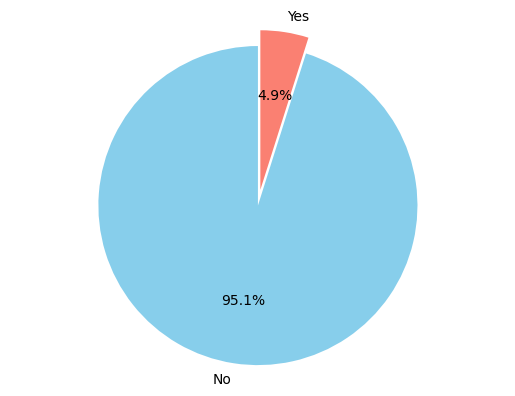

In [102]:
# Count unique values in the 'stroke' column
stroke_counts = df['stroke'].value_counts()

# Create a pie chart
plt.pie(stroke_counts, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode = (0.1, 0))


# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

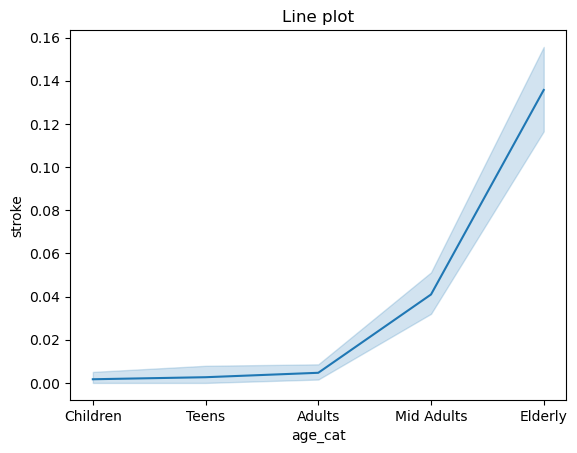

In [105]:
# TODO : visualise the age categories and the target 
# Answering question related to what age categories is more likely to have a stroke?🤔
# you are free to do it with your style and with the way you see it suitable I want to see your solution and ideas 

sns.lineplot(data = bf,
             x="age_cat",
             y="stroke",
             palette = "muted"
             )

plt.title("Line plot")
plt.show()

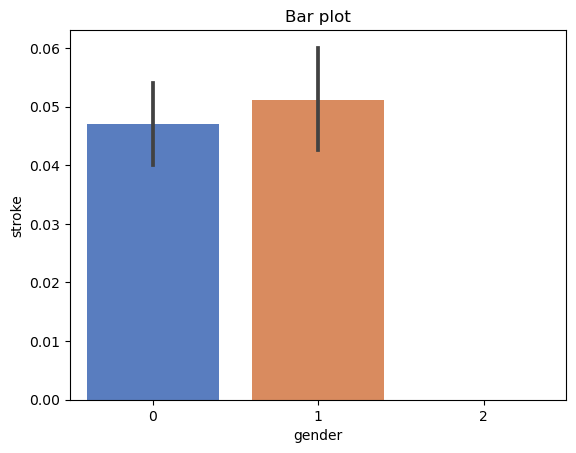

In [106]:
# TODO : visualise the gender and the target
sns.barplot(data=bf,
            x="gender",
            y="stroke",
            palette = "muted"
           )

plt.title("Bar plot")
plt.show()

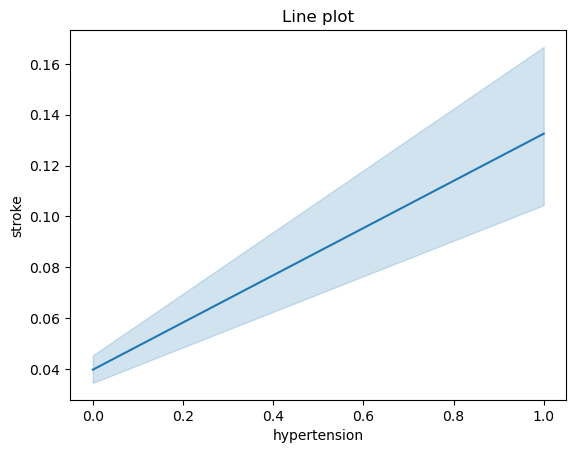

In [108]:
# TODO : visualise the hypertension and the target
sns.lineplot(data=bf,
                x="hypertension",
                y="stroke",
               )

plt.title("Line plot")
plt.show()


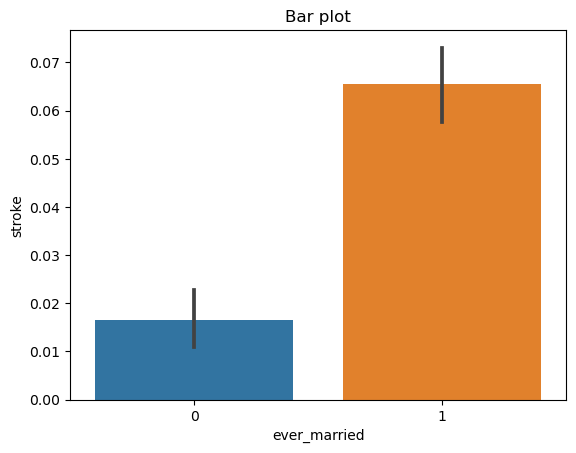

In [112]:
# TODO : visualise ever_married with the target 
sns.barplot(data=bf,
            x="ever_married",
            y="stroke",
           )

plt.title("Bar plot")
plt.show()

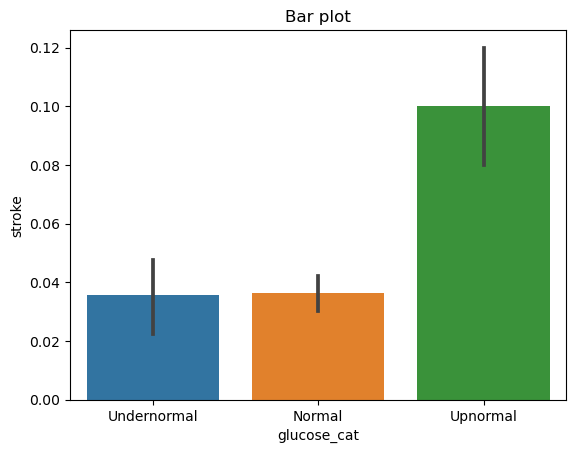

In [125]:
# TODO : visualise glucose_cat with the target
sns.barplot(data=bf,
            x="glucose_cat",
            y="stroke",
           )

plt.title("Bar plot")
plt.show()

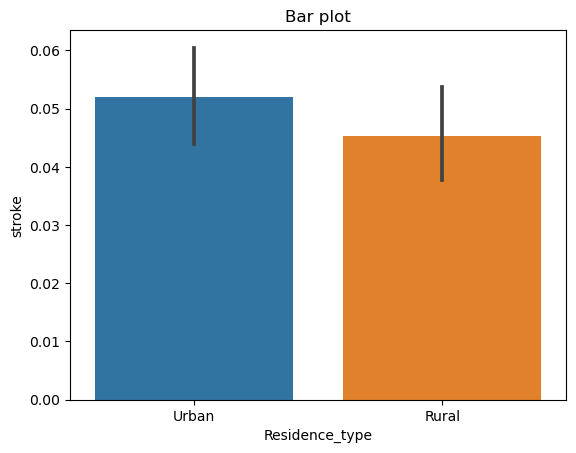

In [129]:
# TODO : Residence_type and the target 
sns.barplot(data=bf,
                x="Residence_type",
                y="stroke",
               )

plt.title("Bar plot")
plt.show()

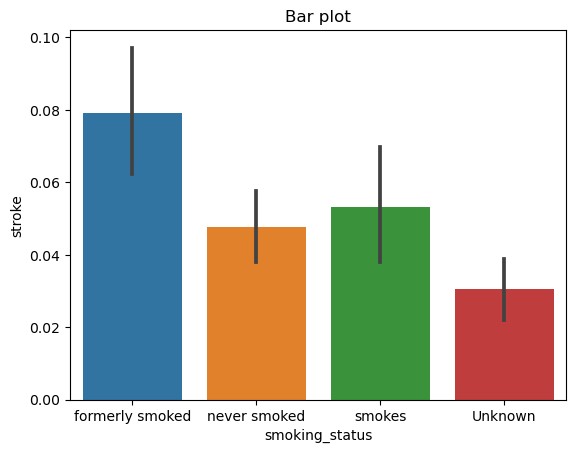

In [130]:
# TODO : smoking_status and the target 
sns.barplot(data=bf,
                x="smoking_status",
                y="stroke",
               )

plt.title("Bar plot")
plt.show()

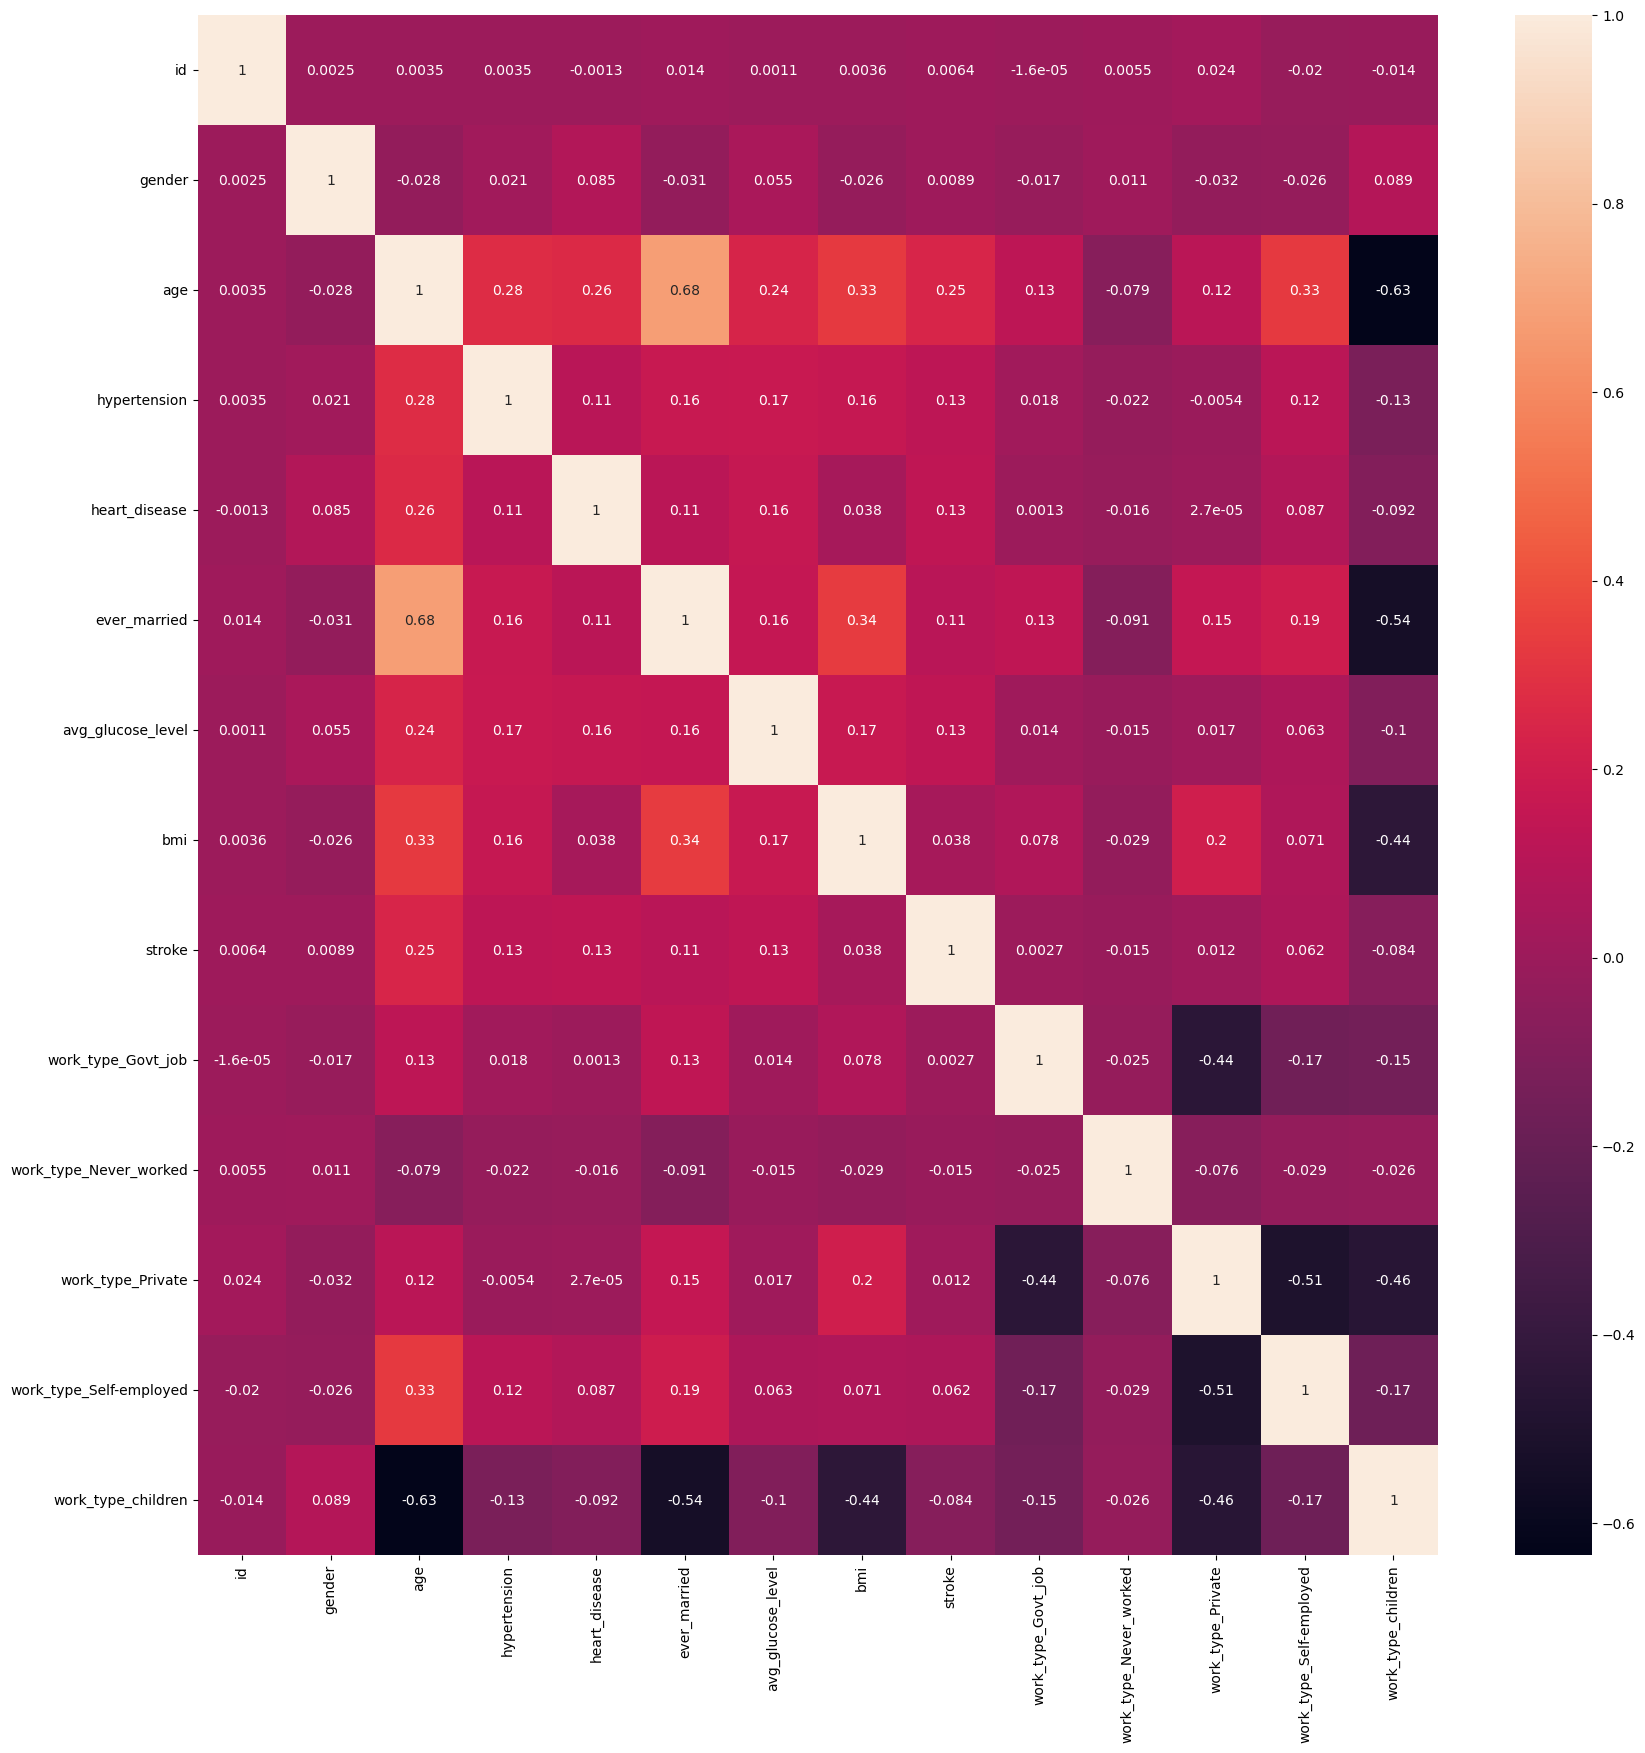

In [98]:
# TODO : build a Correlation Matrix and visualise it 
# explain how the correlation matrix prove you point and the visualstion you made 
import seaborn as sns
# Calculate the correlation coefficients
corr = df.corr()
# Visualize the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [94]:
# more visualisation more appreciated 

# TODO 🎯
> now you should be able to answer most of your stated questions 
> ANSWER them useing a prove from the data and the visuals you made 
- Age ,glucose average and smoking status impact on the stroke
- Gender and Recidence type do not impact on the stroke
- 

# <span style="color:skyblue"> MORE Data Preperation</span>
- Encoding the Strings (categorical features) into numbers so the model can deal with it 
    - Why the model can't deal with strings ? 
    - The model do some math operations matrix multplications needed and this need numbers 
    - Numbers have a meaning to the machien Language no 
- scaling the data (Normalization)


## Encoding 
>encoding is the process of converting categorical (non-numeric) data into a numerical format that can be used as input for machine learning algorithms.

1. **One-Hot Encoding**: This is the most common method. It creates a binary column for each category in the original feature. For example, if you have a "Color" feature with categories "Red," "Blue," and "Green," one-hot encoding would create three binary columns: "IsRed," "IsBlue," and "IsGreen." Each row would have a 1 in the column corresponding to its color and 0s in the other columns.
    
    Pros:
    
    - Preserves all information.
    - Works well with most algorithms.
    
    Cons:
    
    - Can create a large number of new features if the original categorical feature has many unique categories.
    - May lead to multicollinearity (correlation) among the new features.

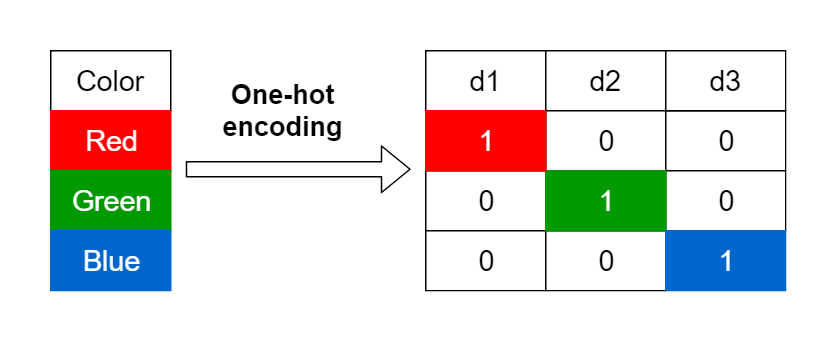


2. **Label Encoding**: In label encoding, each category is assigned a unique integer. For example, "Red" might be encoded as 0, "Blue" as 1, and "Green" as 2.
    
    Pros:
    
    - Simple and efficient.
    - Reduces dimensionality compared to one-hot encoding.
    
    Cons:
    
    - Can introduce ordinal relationships that don't exist in the data (e.g., implying that Green is "greater" than Red, which may not be the case).
    
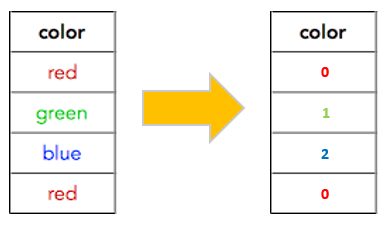

In [25]:
# checking datatypes we have 
# int and float are numerical by nature so we foucs on encoding the object and category types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   object  
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   object  
 6   work_type          5110 non-null   object  
 7   Residence_type     5110 non-null   object  
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                5110 non-null   float64 
 10  smoking_status     5110 non-null   object  
 11  stroke             5110 non-null   int64   
 12  bmi_cat            5110 non-null   category
 13  age_cat            5110 non-null   category
 14  glucose_cat        5110 non-null   category
dtypes: category(3), float64(3), int64(4), object(5)
memory 

In [26]:
df.select_dtypes(include=['O', 'category'])
# to see only the columns names
# df.select_dtypes(include=['O', 'category']).columns

,gender,ever_married,work_type,Residence_type,smoking_status,bmi_cat,age_cat,glucose_cat
0,Male,Yes,Private,Urban,formerly smoked,Obesity,Elderly,Upnormal
1,Female,Yes,Self-employed,Rural,never smoked,Overweight,Elderly,Upnormal
2,Male,Yes,Private,Rural,never smoked,Obesity,Elderly,Normal
3,Female,Yes,Private,Urban,smokes,Obesity,Mid Adults,Upnormal
4,Female,Yes,Self-employed,Rural,never smoked,Ideal,Elderly,Upnormal
...,...,...,...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked,Overweight,Elderly,Normal
5106,Female,Yes,Self-employed,Urban,never smoked,Obesity,Elderly,Upnormal
5107,Female,Yes,Self-employed,Rural,never smoked,Obesity,Adults,Normal
5108,Male,Yes,Private,Rural,formerly smoked,Overweight,Mid Adults,Upnormal


In [27]:
# we are running this code to know the categories in each column (feature)
objcols = df.select_dtypes(include=['O', 'category']).columns
for col in objcols:
    print('='*40)
    print(col)
    print(df[col].value_counts())
    print('='*40)

gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
bmi_cat
Obesity        1893
Overweight     1610
Ideal          1196
Underweight     411
Name: bmi_cat, dtype: int64
age_cat
Mid Adults    1562
Elderly       1304
Adults        1278
Children       588
Teens          378
Name: age_cat, dtype: int64
glucose_cat
Normal         3354
Upnormal       1000
Undernormal     756
Name: glucose_cat, dtype: int64


In [28]:
# How to Encode ?
# Example Ever married ✅ 
'''
you can use this to get the values in the feature
df['ever_married'].value_counts().index
Index(['Yes', 'No'], dtype='object')
you can use it in loops for example to fast the mapping and encoding process
'''
ever_married_mapping = {'Yes' : 1, 'No' : 0}
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df[['ever_married']]


,ever_married
0,1
1,1
2,1
3,1
4,1
...,...
5105,1
5106,1
5107,1
5108,1


In [29]:
df['ever_married'].value_counts()
# we did here a lable Encodeing 

1    3353
0    1757
Name: ever_married, dtype: int64

In [30]:
# example gender using sklearn
from sklearn.preprocessing import LabelEncoder
# Encode categorical features using scikit-learn LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df[['gender']]

,gender
0,1
1,0
2,1
3,0
4,0
...,...
5105,0
5106,0
5107,0
5108,1


In [31]:
df['gender'].value_counts()
# note

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [32]:
# one hot Encodeing 
# you can use OneHotEncoder if you wish
from sklearn.preprocessing import OneHotEncoder
# or using pandas get_dummies() easier way
df = pd.get_dummies(df, columns=['work_type'])
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,Upnormal,0,0,1,0,0
1,51676,0,61.0,0,0,1,Rural,202.21,28.7,never smoked,1,Overweight,Elderly,Upnormal,0,0,0,1,0
2,31112,1,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,Obesity,Elderly,Normal,0,0,1,0,0
3,60182,0,49.0,0,0,1,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults,Upnormal,0,0,1,0,0
4,1665,0,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,Ideal,Elderly,Upnormal,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Urban,83.75,28.7,never smoked,0,Overweight,Elderly,Normal,0,0,1,0,0
5106,44873,0,81.0,0,0,1,Urban,125.20,40.0,never smoked,0,Obesity,Elderly,Upnormal,0,0,0,1,0
5107,19723,0,35.0,0,0,1,Rural,82.99,30.6,never smoked,0,Obesity,Adults,Normal,0,0,0,1,0
5108,37544,1,51.0,0,0,1,Rural,166.29,25.6,formerly smoked,0,Overweight,Mid Adults,Upnormal,0,0,1,0,0


In [33]:
# TODO encode the rest of the column with the way you see suitable 🎯 

#df = None
#print(df.shape)
#print(df.columns)
#display(df.head(5))

In [34]:
# check if there is any other categorical or object columns
df.select_dtypes(include=['O', 'category']).columns

Index(['Residence_type', 'smoking_status', 'bmi_cat', 'age_cat',
       'glucose_cat'],
      dtype='object')

### Why we need to scale the data features?
1. **Normalization**: **Scaling** data to a **specific range or distribution** can help normalize the features, making them comparable and ***avoiding bias towards variables with larger scales***.
2. **Improved Model Performance**: Many machine learning algorithms are sensitive to the scale of the input features. Scaling can help algorithms converge faster and improve their performance. For example, **distance-based algorithms** like k-nearest neighbors (KNN) and clustering algorithms can be influenced by the scale of the features.
3. **Gradient Descent Optimization**: Scaling features can help gradient-based optimization algorithms, it can prevent certain features from dominating the learning process due to their larger scales.
4. **Regularization**: Some regularization techniques, like Ridge regression and Lasso regression, are sensitive to feature scales. Scaling can ensure that regularization is applied uniformly across features.
5. **Visualization**: Scaling data can make it easier to visualize and interpret the data. Plots and graphs are more meaningful when features are on a similar scale.

### Types of scalers?
1. **StandardScaler**: This scaler standardizes features by removing the mean and scaling to unit variance. It transforms the data to have zero mean and unit standard deviation. StandardScaler assumes that the data follows a [Gaussian distribution🔔](!https://hossam-ahmed.notion.site/Normal-distribution-2af1ec317d5f4680867d6ff67a1d8330?pvs=4).
2. **MinMaxScaler**: This scaler scales features to a specified range, typically between 0 and 1. It linearly transforms the data, preserving the shape of the original distribution. MinMaxScaler is sensitive to outliers and can compress the data if the range is not carefully set.
3. **MaxAbsScaler**: This scaler scales features to the range [-1, 1] by dividing through the maximum absolute value in each feature. It does not shift or center the data, preserving the sparsity of the original data.
4. **RobustScaler**: This scaler is robust to outliers and scales features using statistics that are robust to outliers. It removes the median and scales the data according to the Interquartile Range (IQR). RobustScaler is suitable for data that contains significant outliers.
5. **QuantileTransformer**: This scaler transforms features to follow a specified distribution, typically a Gaussian distribution. It applies a non-linear transformation that maps the data to a uniform distribution and then to the desired distribution. QuantileTransformer is less sensitive to outliers and can distort correlations and distances between points.
6. **PowerTransformer**: This scaler applies a power transformation to make the data more Gaussian-like. It supports two types of transformations: the Box-Cox transformation and the Yeo-Johnson transformation. PowerTransformer is useful when the data does not follow a Gaussian distribution.

#### TODO 🎯 : What is an outlier? 
>search and wirite your notes and search results in this Markdown cell 


In [35]:
df

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,67.0,0,1,1,Urban,228.69,36.6,formerly smoked,1,Obesity,Elderly,Upnormal,0,0,1,0,0
1,51676,0,61.0,0,0,1,Rural,202.21,28.7,never smoked,1,Overweight,Elderly,Upnormal,0,0,0,1,0
2,31112,1,80.0,0,1,1,Rural,105.92,32.5,never smoked,1,Obesity,Elderly,Normal,0,0,1,0,0
3,60182,0,49.0,0,0,1,Urban,171.23,34.4,smokes,1,Obesity,Mid Adults,Upnormal,0,0,1,0,0
4,1665,0,79.0,1,0,1,Rural,174.12,24.0,never smoked,1,Ideal,Elderly,Upnormal,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,Urban,83.75,28.7,never smoked,0,Overweight,Elderly,Normal,0,0,1,0,0
5106,44873,0,81.0,0,0,1,Urban,125.20,40.0,never smoked,0,Obesity,Elderly,Upnormal,0,0,0,1,0
5107,19723,0,35.0,0,0,1,Rural,82.99,30.6,never smoked,0,Obesity,Adults,Normal,0,0,0,1,0
5108,37544,1,51.0,0,0,1,Rural,166.29,25.6,formerly smoked,0,Overweight,Mid Adults,Upnormal,0,0,1,0,0


In [51]:
# importing different scalers to be used 
# TODO: you should try to scale your dataset with each of these types and build the model -> evaluate it and re do this cycle with different sclaers to note which one is the best
# hint 💡 if you find this a tedious task you can search for how to use pipelines; this is optional but if you did you learn too much and get bouns✨🎯
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# StandardScaler example
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# TODO MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])
# TODO RobustScaler
robust_scaler = RobustScaler()
robust_scaled_data = robust_scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])


In [52]:
# display(scaled_data, min_max_scaled_data, robust_scaled_data)
pd.DataFrame(scaled_data)
pd.DataFrame(min_max_scaled_data)
pd.DataFrame(robust_scaled_data)

,0,1,2
0,0.611111,3.712987,0.911111
1,0.444444,2.994300,0.033333
2,0.972222,0.380920,0.455556
3,0.111111,2.153481,0.666667
4,0.944444,2.231917,-0.488889
...,...,...,...
5105,0.972222,-0.220790,0.033333
5106,1.000000,0.904193,1.288889
5107,-0.277778,-0.241417,0.244444
5108,0.166667,2.019406,-0.311111


In [53]:
# for example I am going to use the StandardScale
sdf = pd.DataFrame(scaled_data, columns = ['age', 'avg_glucose_level', 'bmi'])
sdf

,age,avg_glucose_level,bmi
0,1.051434,2.706375,1.002210
1,0.786070,2.121559,-0.024117
2,1.626390,-0.005028,0.469559
3,0.255342,1.437358,0.716397
4,1.582163,1.501184,-0.634716
...,...,...,...
5105,1.626390,-0.494658,-0.024117
5106,1.670617,0.420775,1.443920
5107,-0.363842,-0.511443,0.222721
5108,0.343796,1.328257,-0.426853


In [39]:
bf = df
bf.loc[:, ['age', 'avg_glucose_level', 'bmi']] = sdf[['age', 'avg_glucose_level', 'bmi']]
bf

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_cat,age_cat,glucose_cat,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,9046,1,1.051434,0,1,1,Urban,2.706375,1.002210,formerly smoked,1,Obesity,Elderly,Upnormal,0,0,1,0,0
1,51676,0,0.786070,0,0,1,Rural,2.121559,-0.024117,never smoked,1,Overweight,Elderly,Upnormal,0,0,0,1,0
2,31112,1,1.626390,0,1,1,Rural,-0.005028,0.469559,never smoked,1,Obesity,Elderly,Normal,0,0,1,0,0
3,60182,0,0.255342,0,0,1,Urban,1.437358,0.716397,smokes,1,Obesity,Mid Adults,Upnormal,0,0,1,0,0
4,1665,0,1.582163,1,0,1,Rural,1.501184,-0.634716,never smoked,1,Ideal,Elderly,Upnormal,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,1.626390,1,0,1,Urban,-0.494658,-0.024117,never smoked,0,Overweight,Elderly,Normal,0,0,1,0,0
5106,44873,0,1.670617,0,0,1,Urban,0.420775,1.443920,never smoked,0,Obesity,Elderly,Upnormal,0,0,0,1,0
5107,19723,0,-0.363842,0,0,1,Rural,-0.511443,0.222721,never smoked,0,Obesity,Adults,Normal,0,0,0,1,0
5108,37544,1,0.343796,0,0,1,Rural,1.328257,-0.426853,formerly smoked,0,Overweight,Mid Adults,Upnormal,0,0,1,0,0


### Extra point 🌟 optional 
> Parallel Coordinates Plot, also known as a Parallel Coordinate Plot or PCP, is a multivariate data visualization technique used to display and explore relationships among multiple numeric variables. It's particularly useful for visualizing high-dimensional datasets and identifying patterns, trends, or outliers within the data.
1. **Vertical Axes:** Each numeric variable in your dataset is represented by a vertical axis or a parallel line on the plot. These axes are parallel to each other and equally spaced horizontally.
2. **Data Lines:** Data points in your dataset are represented as lines that connect values for each variable along the respective axes. Each line represents an individual data point, and its path along the axes reveals how that data point's values compare across variables.

**Interpreting a Parallel Coordinates Plot:**

- **Patterns:** Parallel Coordinates Plots are excellent for identifying patterns in your data. Patterns may manifest as lines that follow a specific trajectory or show clustering of data points.
- **Outliers:** Outliers are data points that deviate significantly from the norm. In a Parallel Coordinates Plot, they often appear as lines that stand out from the majority of the data.
- **Correlations:** By examining how lines move in relation to each other, you can infer correlations or dependencies between variables. Variables that move together or exhibit similar trends suggest a positive correlation, while those moving in opposite directions suggest a negative correlation.

**Customization and Tips:**

- **Normalization:** Since variables may have different scales or units, it's common to normalize the data before creating a Parallel Coordinates Plot to ensure fair comparison.
- **Color Mapping:** You can use color to differentiate between different categories or groups within your dataset. Each category can be represented by a unique color for the lines, making it easier to distinguish patterns.
- **Axis Reordering:** You can reorder the axes to highlight specific patterns or emphasize certain variables.
- **Interactive Plots:** Some visualization libraries and tools allow for interactive Parallel Coordinates Plots, enabling you to filter, zoom, and explore the data dynamically.

In [54]:
import plotly.express as px
#TODO Create a parallel coordinates plot
fig = px.parallel_coordinates(bf, color='stroke')

# Show the plot
fig.show()

# <span style="color:skyblue">Model Building : Logistic Regression</span>


## Train and Test sets
1. **Training Set:** The training set is a subset of the original dataset used to train the machine learning model. It contains input data (features) and the corresponding known output or target values. During the training phase, the model learns patterns and relationships in the data to make predictions or classify new, unseen data.
2. **Test Set:** The test set is another subset of the original dataset that is <span style='color:red'>not used during model training</span>. It serves as an independent dataset to assess how well the trained model generalizes to new, unseen data. The test set usually contains input data, but the corresponding target values are withheld. The model predictions on the test set can be compared to the actual target values to evaluate its performance. 

### Why we need that?
- **Model Evaluation:** By evaluating the model's performance on the test set, you can estimate ***how well it will perform on unseen data***. This evaluation helps assess the model's ability to generalize and provides insights into its strengths and weaknesses.
- **Preventing Overfitting:** Overfitting occurs when a model becomes too specialized in the training data and performs poorly on new data. By using a separate test set, you can evaluate the model's performance on unseen data and detect if it is overfitting. This information can guide you in adjusting the model or its hyperparameters to improve generalization.

In [78]:
# How to achieve this concept in code
# step1: 1️⃣ 
# TODO Split the data you have to X features and y target
# X is all columns except the target stroke

X = bf[['age', 'bmi','gender','age','hypertension','heart_disease','ever_married','avg_glucose_level']]
y = bf['stroke']

In [79]:
# now after you have your data splited to features(predictores) independent features and the target the (predicted) dependent feature
# you should split to train, and test 
# we would use somefunction from sklearn to help us having train and test sets
# step 2️⃣
from sklearn.model_selection import train_test_split
# Assuming you have your data and labels (X and y)
# X is your feature data, and y is your target variable

# Split the data into training and testing sets (e.g., 80% train, 40% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Parameters:
# - X: The feature data
# - y: The target variable
# - test_size: The proportion of the dataset to include in the test split (e.g., 0.2 for 20% test)
# - random_state: An optional random seed for reproducibility



In [80]:
# training a logistic regression model 
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Once fitted, the model is ready to make predictions or be evaluated.

LogisticRegression()

# <span style="color:skyblue">Model Evaluation</span>


In [81]:
# Predict on a new dataset (e.g., your test data)
y_pred = logistic_model.predict(X_test)
#y_pred

In [82]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.5f}')


Accuracy: 0.94951


# <span style="color:salmon">Can We do better?</span>
- we can see that we have problem of unblanced target 
- This thing is a common problem in medical problems 
- Suggested ways to solve it 🌟 


> Addressing the issue of unbalanced target classes in a classification problem is important because it can lead to biased models that perform poorly on the minority class. There are several strategies you can employ to handle class imbalance:
> 
1. **Resampling Techniques**:
    - **Oversampling**: Increase the number of instances in the minority class by randomly duplicating samples or generating synthetic samples. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help create synthetic samples.
    - **Undersampling**: Reduce the number of instances in the majority class by randomly removing samples. Be cautious with this method as it may lead to loss of important information.
2. **Different Algorithms**:
    - Some machine learning algorithms are less sensitive to class imbalance. For example, decision trees and random forests can work well with imbalanced data because they can give more weight to the minority class. (third week)
3. **Using Different Evaluation Metrics**:
    - Instead of accuracy, use evaluation metrics like precision, recall, F1-score, or the area under the ROC curve (AUC-ROC). These metrics consider the performance of the classifier for each class, providing a more comprehensive view of its effectiveness.
4. **Class Weights**:
    - Many machine learning libraries allow you to assign different weights to classes. By giving more weight to the minority class, you can make the algorithm pay more attention to it during training. In scikit-learn, you can set the `class_weight` parameter in many classifiers.
5. **Anomaly Detection**:
    - Treat the minority class as an anomaly detection problem. This involves training the model to identify rare events as anomalies.(fourth week)
6. **Ensemble Methods**:
    - Use ensemble methods like EasyEnsemble, BalanceCascade, or weighted ensembles. These techniques combine multiple models to improve classification performance on imbalanced datasets. (third week)
7. **Cost-sensitive Learning**:
    - Introduce a cost matrix that assigns different misclassification costs to different classes. This way, the algorithm considers the imbalance during training.
8. **Collect More Data**:
    - If possible, gather more data for the minority class. This can help balance the dataset naturally.
9. **Threshold Adjustment**:
    - Adjust the classification threshold. By default, most classifiers use a threshold of 0.5 for binary classification. You can increase or decrease this threshold based on the specific requirements of your problem to prioritize precision or recall.
10. **Ensemble of Different Models**:
    - Combine multiple models trained on different subsets of the data or using different techniques to improve classification accuracy.(third week)

In [83]:
# Class Weights example of how to deal with unbalanced target
'''
using the class_weight parameter. Assign a higher weight to the minority class to make the model pay more attention to it during training.
'''
lg_model_balanced = LogisticRegression(class_weight=[1,7])

# Fit the model to the training data
lg_model_balanced.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lg_model_balanced.predict(X_test)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9495107632093933


# <span style="color:skyblue">Model Deployment</span>


In [ ]:
# TODO save the model
# after saving the model you may want to use it within a GUI or a web application for exampl a patient input the answer of the questions which represent the 
# feature you trained the model on, don't forget to do the preprocessing you did or the scalling beacuse the model you save expect a prossed data in a specific format
# this point is bouns🌠  and you can do it after the Deadline if you need more time for searching 